<a href="https://colab.research.google.com/github/barzansaeedpour/PyTorch-for-DeepLearning-Course/blob/main/01_PyTorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## import packages

```
# This is formatted as code
```



In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__


'2.1.0+cu121'

Create device-agnostic code.

This means if we've got access to a GPU, our code will use it (for potentially faster computing).

If no GPU is available, the code will default to using CPU.

In [2]:
# Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'   # cuda is for GPU
print(f"Using device: {device}")

Using device: cuda


In [3]:
!nvidia-smi

Fri Mar  1 19:25:00 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8              11W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Data

In [4]:
# Create some data using the linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3


# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim = 1) # without unsqueeze, errors will pop up
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
#  Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [14]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels= y_test,
                     predictions = None):
    """
    Plots training data, test data and compares predictions.
    """

    plt.figure(figsize= (8, 5))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c = 'b', s = 4, label = 'Training data')

    # Plot test data in blue
    plt.scatter(test_data, test_labels, c = 'g', s = 4, label = 'Testing data')

    # Are there predicitons?
    if predictions is not None:
        # Plot the predictions if they exist
        plt.scatter(test_data, predictions, c = 'r', s = 4, label = 'Predictions')

    # Show the legend
    plt.legend(prop = {"size": 14})

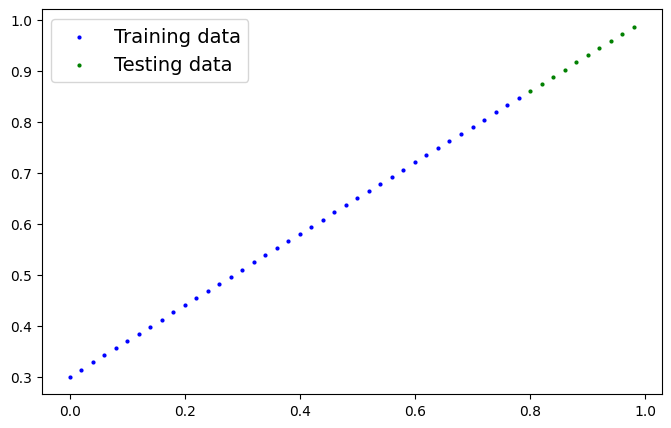

In [15]:
# Plot the data
plot_predictions(X_train, y_train, X_test, y_test)